In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as plt_c

In [34]:
# ----

In [35]:
def simulate_model(init_inv, freq_inv, gain, t, 
                   num_inv, p_win, p_reinvested, transaction_cost=1):

    
    investment_positions = [init_inv / num_inv for _ in range(num_inv)]
    
    for i in range(t):
        
        new_investment_positions = []
        
        for (i, net) in enumerate(investment_positions):
            
            amount_invested = net * (p_reinvested / 100)
            value_gain = amount_invested * (gain / 100) - transaction_cost

            if (np.random.rand() * 100) <= p_win:
                investment_positions[i] += value_gain
            else:
                investment_positions[i] -= value_gain
                
            investment_positions[i] += freq_inv / num_inv
            
    return sum(investment_positions)


    
#     new_inv_pos = []

#     tot = freq_inv + init_inv

#     for (net, dif) in investment_positions:
#         if dif < 0. and not (np.random.rand() * 100) <= p_close_with_loss:
#             new_inv_pos.append((net, dif))
#         else:
#             tot += net + dif

#     if num_inv > len(new_inv_pos):

#         partial = tot / (num_inv - len(new_inv_pos))
#         partial_invested = partial * (p_reinvested / 100)
        
#         new_gain = partial_invested * (gain / 100) - trans_cost

#         for _ in range(num_inv - len(new_inv_pos)):
#             if (np.random.rand() * 100) <= p_gain:
#                 new_inv_pos.append((partial, new_gain))
#             else:
#                 new_inv_pos.append((partial, -new_gain))

#     if t <= 0:
#         return tot
#     else:
#         return simulate_model(init_inv = 0., 
#                               freq_inv = freq_inv, 
#                               gain = gain, 
#                               t = t-1, 
#                               num_inv = num_inv, 
#                               p_gain = p_gain, 
#                               p_reinvested = p_reinvested,
#                               p_close_with_loss = p_close_with_loss, 
#                               investment_positions = new_inv_pos)

In [156]:
years_to_test = 3
weeks_to_test = 52 * years_to_test
days_to_test = 245 * years_to_test # 261 - (~#holidays)

gain = 30. # %

percentage_reinvested = 50

initial_investment = 5000
recurrent_investment = 0

parallel_investments = 50

model_accuracy = 55 # % correct (estimate optimal)

figure_size = (10, 7)

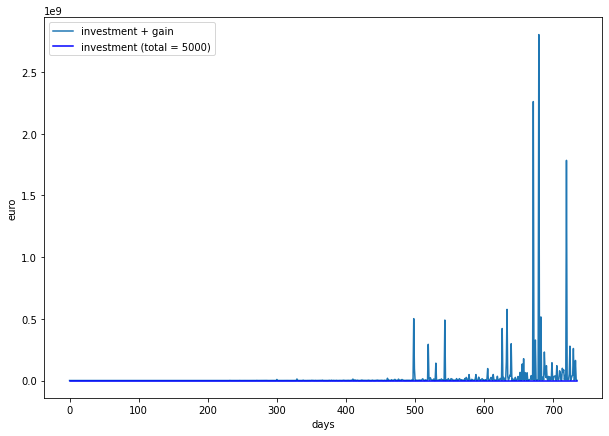

In [157]:
sim = [simulate_model(init_inv = initial_investment, freq_inv = recurrent_investment, 
                      gain = gain, t = t, num_inv = parallel_investments,
                      p_win = model_accuracy, p_reinvested = percentage_reinvested) for t in range(days_to_test)]

plt.figure(figsize=figure_size)
plt.plot(sim)
plt.plot([initial_investment + recurrent_investment * (w+1) for w in range(days_to_test)], c='b')
plt.legend(['investment + gain', 'investment (total = ' + str(initial_investment + recurrent_investment * days_to_test) + ')'])
plt.xlabel('days')
plt.ylabel('euro')
plt.show()

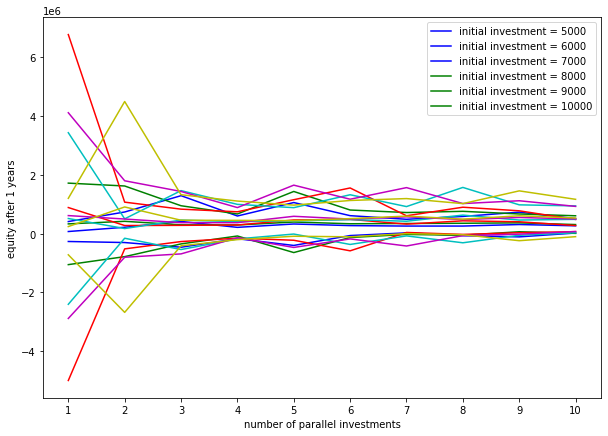

In [18]:
samples = 100
num_parallel_inv_to_test = [i for i in range(1, 11)]
initial_inv_to_test = [5000, 6000, 7000, 8000, 9000, 10000]

plt.figure(figsize=figure_size)

sim = np.zeros([samples, len(num_parallel_inv_to_test), len(initial_inv_to_test)])

for s in range(samples):
    for (i, piv) in enumerate(num_parallel_inv_to_test):
        for (j, iiv) in enumerate(initial_inv_to_test):

            sim[s, i, j] = simulate_model(
                iiv,
                weekly_investment, 
                weekly_return,
                weeks_to_test,
                piv, 
                model_accuracy, 
                p_stock_rebound, 
                p_sell_with_loss)

            
for i in range(len(initial_inv_to_test)):
    col = list(plt_c.BASE_COLORS.keys())[i]
    plt.plot(sim.mean(0)[:, i], c=col)
    plt.plot(sim.mean(0)[:, i] + sim.std(0)[:, i], c=col)
    plt.plot(sim.mean(0)[:, i] - sim.std(0)[:, i], c=col)

    
plt.legend(['initial investment = ' + str(iiv) for iiv in initial_inv_to_test])
plt.xlabel('number of parallel investments')
plt.xticks([i for i in range(len(num_parallel_inv_to_test))], [a for a in num_parallel_inv_to_test])
plt.ylabel('equity after ' + str(years_to_test) + ' years')
plt.show()
    
